In [3]:
import colorsys
import matplotlib.pyplot as plt
import random

def hex_to_rgb(hex_color):
    return tuple(int(hex_color[i:i+2], 16) for i in (1, 3, 5))

def rgb_to_hex(rgb):
    return f"#{rgb[0]:02x}{rgb[1]:02x}{rgb[2]:02x}"

def rgb_to_hsl(rgb):
    r, g, b = [x / 255.0 for x in rgb]
    h, l, s = colorsys.rgb_to_hls(r, g, b)
    return (h * 360, s * 100, l * 100)

def hsl_to_rgb(hsl):
    h, s, l = hsl[0] / 360.0, hsl[1] / 100.0, hsl[2] / 100.0
    r, g, b = colorsys.hls_to_rgb(h, l, s)
    return tuple(int(x * 255) for x in (r, g, b))

def get_contrast_ratio(rgb1, rgb2):
    def get_luminance(rgb):
        rgb = [x / 255.0 for x in rgb]
        rgb = [x / 12.92 if x <= 0.03928 else ((x + 0.055) / 1.055) ** 2.4 for x in rgb]
        return 0.2126 * rgb[0] + 0.7152 * rgb[1] + 0.0722 * rgb[2]
    
    l1, l2 = get_luminance(rgb1), get_luminance(rgb2)
    return (max(l1, l2) + 0.05) / (min(l1, l2) + 0.05)

def generate_palette(seed_color, mode='light', harmony='complementary', bias=0):
    # Convert seed color to HSL
    seed_rgb = hex_to_rgb(seed_color)
    seed_hsl = rgb_to_hsl(seed_rgb)
    
    # Generate primary colors
    primary = seed_hsl
    secondary = ((primary[0] + 180 + bias) % 360, primary[1], primary[2])
    tertiary = ((primary[0] + 90 + bias) % 360, primary[1], primary[2])
    
    # Generate shades
    def generate_shades(color):
        base_l = color[2]
        return [
            (color[0], color[1], max(0, base_l - 30)),
            color,
            (color[0], color[1], min(100, base_l + 30))
        ]
    
    primary_shades = generate_shades(primary)
    secondary_shades = generate_shades(secondary)
    tertiary_shades = generate_shades(tertiary)
    
    # Generate semantic colors
    error = ((0 + bias) % 360, 100, 50)
    success = ((120 + bias) % 360, 100, 50)
    info = ((200 + bias) % 360, 100, 50)
    warning = ((40 + bias) % 360, 100, 50)
    
    # Generate surface colors
    surface = (0, 0, mode == 'light' and 95 or 20)
    on_surface = (0, 0, mode == 'light' and 10 or 90)
    
    # Convert all colors to RGB and HEX
    palette = {
        'primary': [rgb_to_hex(hsl_to_rgb(shade)) for shade in primary_shades],
        'secondary': [rgb_to_hex(hsl_to_rgb(shade)) for shade in secondary_shades],
        'tertiary': [rgb_to_hex(hsl_to_rgb(shade)) for shade in tertiary_shades],
        'semantic': {
            'error': rgb_to_hex(hsl_to_rgb(error)),
            'success': rgb_to_hex(hsl_to_rgb(success)),
            'info': rgb_to_hex(hsl_to_rgb(info)),
            'warning': rgb_to_hex(hsl_to_rgb(warning))
        },
        'surface': {
            'background': rgb_to_hex(hsl_to_rgb(surface)),
            'onSurface': rgb_to_hex(hsl_to_rgb(on_surface))
        }
    }
    
    return palette

def visualize_palette(palette):
    fig, axs = plt.subplots(5, 1, figsize=(10, 15))
    fig.suptitle("Color Palette")
    
    # Visualize primary, secondary, and tertiary colors
    for i, color_type in enumerate(['primary', 'secondary', 'tertiary']):
        axs[i].bar(range(3), [1, 1, 1], color=palette[color_type])
        axs[i].set_title(color_type.capitalize())
        axs[i].set_xticks(range(3))
        axs[i].set_xticklabels(palette[color_type])
    
    # Visualize semantic colors
    semantic_colors = list(palette['semantic'].values())
    axs[3].bar(range(4), [1, 1, 1, 1], color=semantic_colors)
    axs[3].set_title("Semantic Colors")
    axs[3].set_xticks(range(4))
    axs[3].set_xticklabels(list(palette['semantic'].keys()))
    
    # Visualize surface colors
    surface_colors = list(palette['surface'].values())
    axs[4].bar(range(2), [1, 1], color=surface_colors)
    axs[4].set_title("Surface Colors")
    axs[4].set_xticks(range(2))
    axs[4].set_xticklabels(list(palette['surface'].keys()))
    
    plt.tight_layout()
    plt.show()

Light Palette:
{'primary': ['#073e96', '#4286f4', '#d3e3fc'], 'secondary': ['#965f07', '#f4b042', '#fcecd3'], 'tertiary': ['#960785', '#f442e0', '#fcd3f7'], 'semantic': {'error': '#ff0000', 'success': '#00ff00', 'info': '#00a9ff', 'warning': '#ffaa00'}, 'surface': {'background': '#f2f2f2', 'onSurface': '#191919'}}


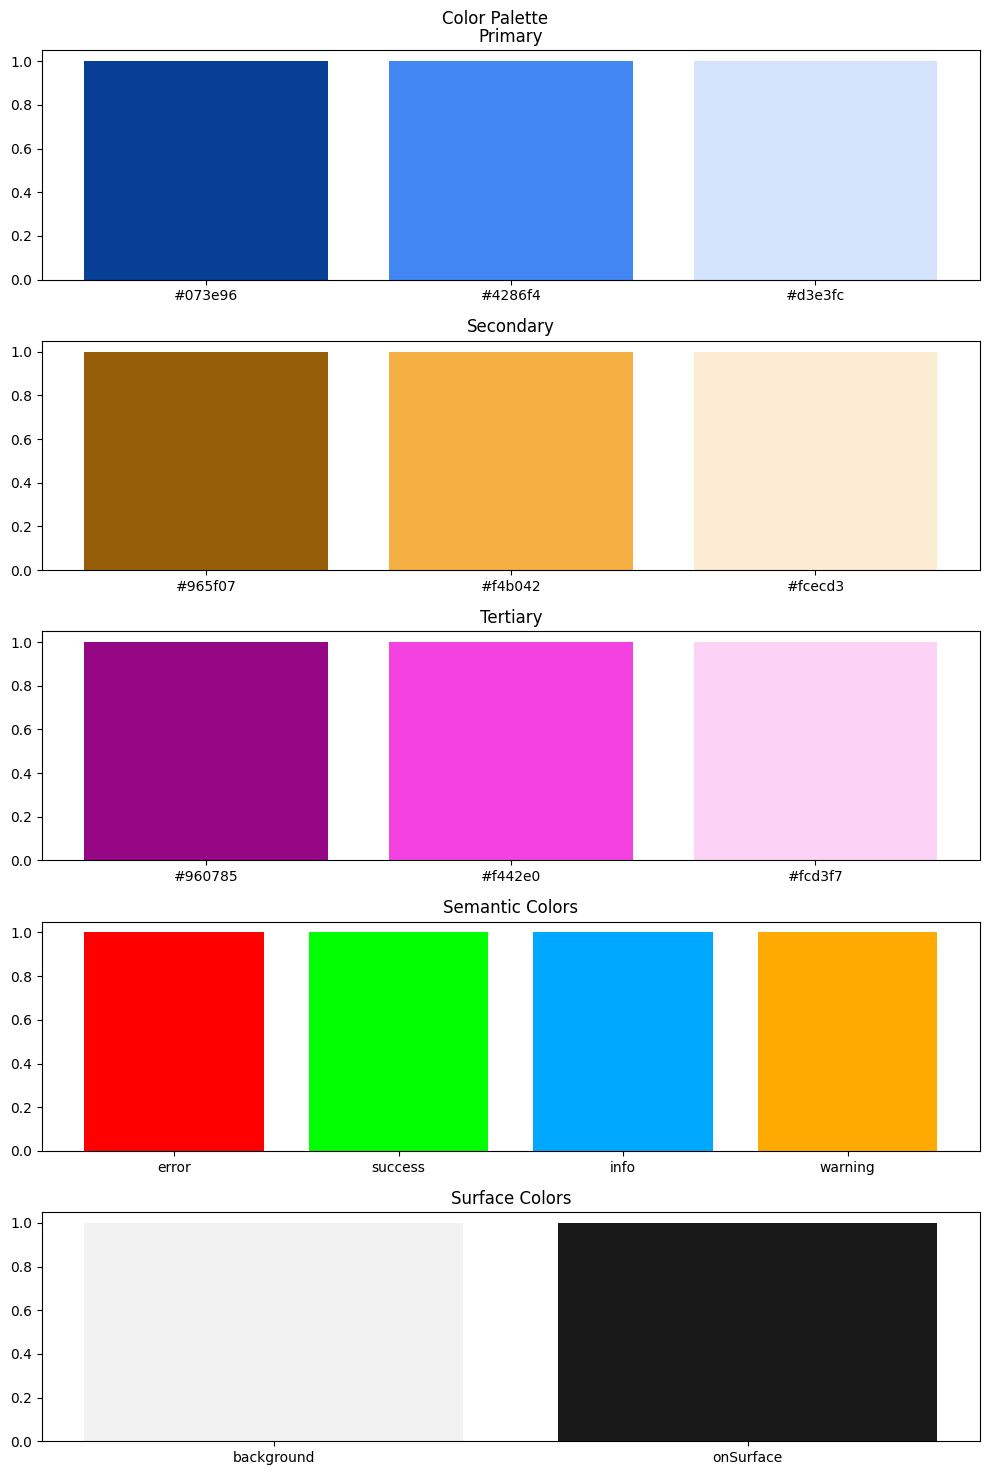


Dark Palette:
{'primary': ['#073e96', '#4286f4', '#d3e3fc'], 'secondary': ['#965f07', '#f4b042', '#fcecd3'], 'tertiary': ['#960785', '#f442e0', '#fcd3f7'], 'semantic': {'error': '#ff0000', 'success': '#00ff00', 'info': '#00a9ff', 'warning': '#ffaa00'}, 'surface': {'background': '#333333', 'onSurface': '#e5e5e5'}}


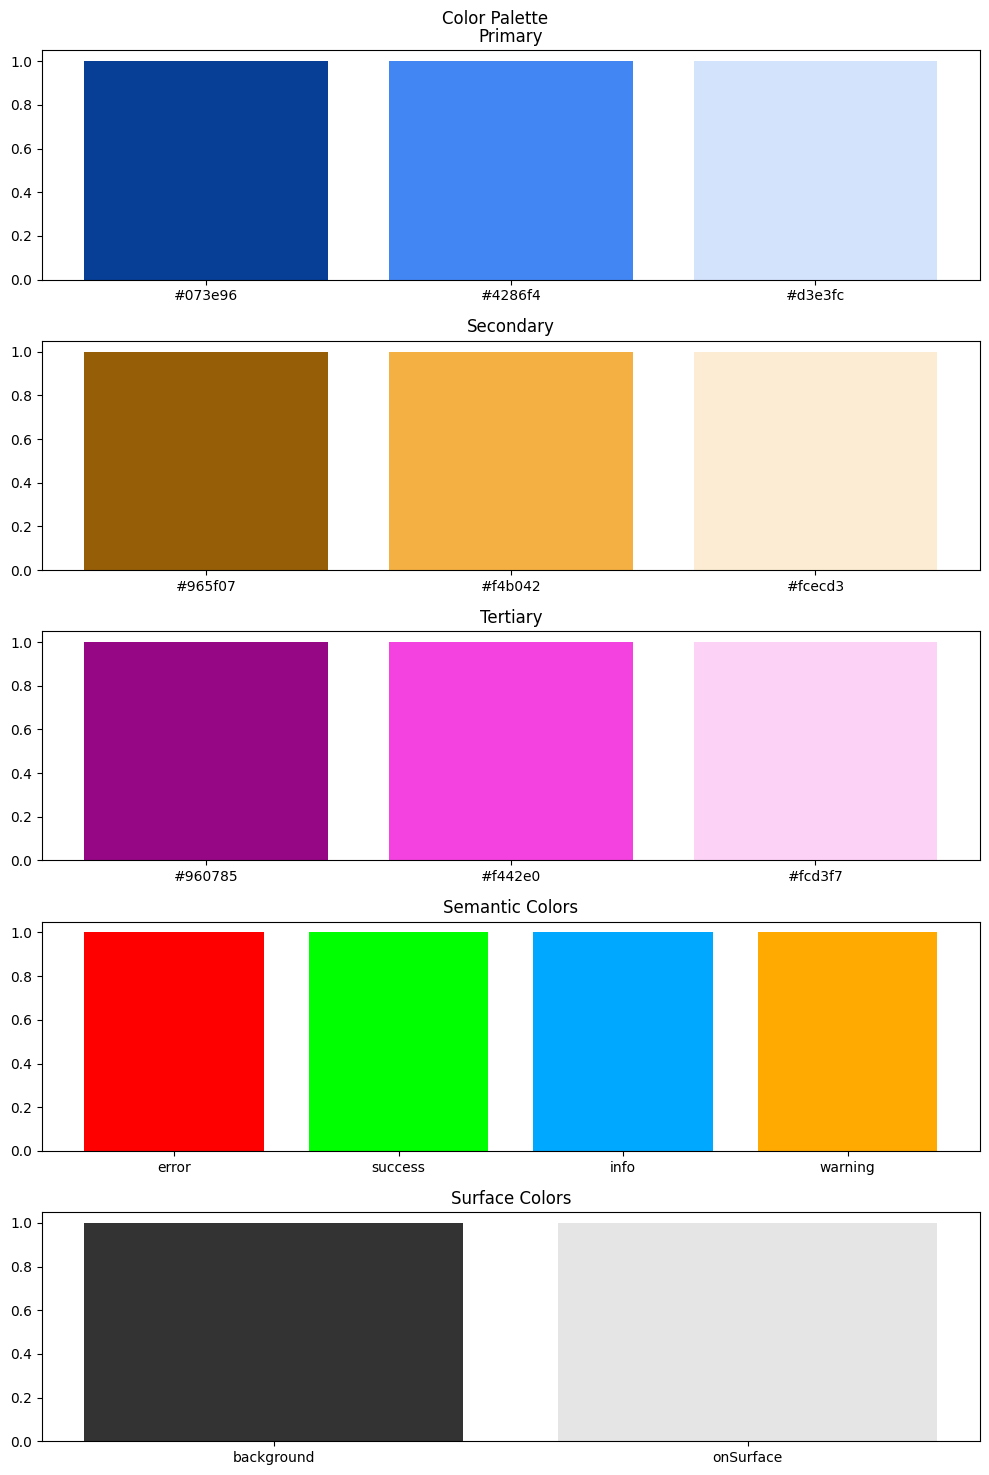

In [4]:
# Example usage
seed_color = "#4287f5"  # A nice blue color
light_palette = generate_palette(seed_color, mode='light', harmony='complementary', bias=0)
dark_palette = generate_palette(seed_color, mode='dark', harmony='complementary', bias=0)

print("Light Palette:")
print(light_palette)
visualize_palette(light_palette)

print("\nDark Palette:")
print(dark_palette)
visualize_palette(dark_palette)